# Comparing samples of wide binaries from different catalogs

In [21]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import corner

import sys
sys.path.append('../src')
import P_random

%matplotlib inline

### Our pairs

In [69]:
dtype = [('P_posterior','f8'), ('theta','f8'),
         ('source_id_1','<i8'), ('TYC_id_1','S11'), ('hip_id_1','<i8'),
         ('ra_1','f8'), ('dec_1','f8'),
         ('mu_ra_1','f8'), ('mu_dec_1','f8'), ('mu_ra_err_1','f8'), ('mu_dec_err_1','f8'),
         ('plx_1','f8'), ('plx_err_1','f8'),
         ('gaia_g_flux_1','<f8'), ('gaia_g_flux_err_1','<f8'), ('gaia_g_mag_1','<f8'),
         ('TMASS_id_1','<i8'), ('TMASS_angle_dist_1','<f8'),
         ('TMASS_n_neighbours_1','<i8'), ('TMASS_n_mates_1','<i8'), ('TMASS_ph_qual_1','S11'),
         ('TMASS_ra_1','<f8'), ('TMASS_dec_1','<f8'),
         ('TMASS_j_mag_1','<f8'), ('TMASS_j_mag_err_1','<f8'),
         ('TMASS_h_mag_1','<f8'), ('TMASS_h_mag_err_1','<f8'),
         ('TMASS_ks_mag_1','<f8'), ('TMASS_ks_mag_err_1','<f8'),
         ('TYC_Vt_1','<f8'), ('TYC_Vt_err_1','<f8'),
         ('TYC_Bt_1','<f8'), ('TYC_Bt_err_1','<f8'),
         ('gaia_delta_Q_1','<f8'), ('gaia_noise_1','<f8'),
         #
         ('source_id_2','<i8'), ('TYC_id_2','S11'), ('hip_id_2','<i8'),
         ('ra_2','f8'), ('dec_2','f8'),
         ('mu_ra_2','f8'), ('mu_dec_2','f8'), ('mu_ra_err_2','f8'), ('mu_dec_err_2','f8'),
         ('plx_2','f8'), ('plx_err_2','f8'),
         ('gaia_g_flux_2','<f8'), ('gaia_g_flux_err_2','<f8'), ('gaia_g_mag_2','<f8'),
         ('TMASS_id_2','<i8'), ('TMASS_angle_dist_2','<f8'),
         ('TMASS_n_neighbours_2','<i8'), ('TMASS_n_mates_2','<i8'), ('TMASS_ph_qual_2','S11'),
         ('TMASS_ra_2','<f8'), ('TMASS_dec_2','<f8'),
         ('TMASS_j_mag_2','<f8'), ('TMASS_j_mag_err_2','<f8'),
         ('TMASS_h_mag_2','<f8'), ('TMASS_h_mag_err_2','<f8'),
         ('TMASS_ks_mag_2','<f8'), ('TMASS_ks_mag_err_2','<f8'),
         ('TYC_Vt_2','<f8'), ('TYC_Vt_err_2','<f8'),
         ('TYC_Bt_2','<f8'), ('TYC_Bt_err_2','<f8'),
         ('gaia_delta_Q_2','<f8'), ('gaia_noise_2','<f8')
        ]

folder = '../data/TGAS/'

TGAS = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_cleaned.txt', dtype=dtype, names=True)
TGAS = TGAS[TGAS['P_posterior'] > 0.99]
print len(TGAS), TGAS.dtype

6074 [('P_posterior', '<f8'), ('theta', '<f8'), ('source_ID_1', '<i8'), ('TYC_ID_1', 'S11'), ('HIP_ID_1', '<i8'), ('ra_1', '<f8'), ('dec_1', '<f8'), ('mu_ra_1', '<f8'), ('mu_dec_1', '<f8'), ('mu_ra_err_1', '<f8'), ('mu_dec_err_1', '<f8'), ('plx_1', '<f8'), ('plx_err_1', '<f8'), ('gaia_g_flux_1', '<f8'), ('gaia_g_flux_err_1', '<f8'), ('gaia_g_mag_1', '<f8'), ('2MASS_ID_1', '<i8'), ('2MASS_angle_dist_1', '<f8'), ('2MASS_n_neighbours_1', '<i8'), ('2MASS_n_mates_1', '<i8'), ('2MASS_ph_qual_1', 'S11'), ('2MASS_ra_1', '<f8'), ('2MASS_dec_1', '<f8'), ('2MASS_j_mag_1', '<f8'), ('2MASS_j_mag_err_1', '<f8'), ('2MASS_h_mag_1', '<f8'), ('2MASS_h_mag_err_1', '<f8'), ('2MASS_ks_mag_1', '<f8'), ('2MASS_ks_mag_err_1', '<f8'), ('Tycho_Vt_1', '<f8'), ('Tycho_Vt_err_1', '<f8'), ('Tycho_Bt_1', '<f8'), ('Tycho_Bt_err_1', '<f8'), ('Gaia_delta_Q_1', '<f8'), ('Gaia_noise_1', '<f8'), ('source_ID_2', '<i8'), ('TYC_ID_2', 'S11'), ('HIP_ID_2', '<i8'), ('ra_2', '<f8'), ('dec_2', '<f8'), ('mu_ra_2', '<f8'), ('mu_de

### Chaname & Gould (2004) 

In [3]:
# Read in sample from Tycho-2 table

#filename = ('../data/rNLTT/catalog_tabs.dat')
filename = ('../data/rNLTT/Chaname_Gould_pairs.dat')
CG04 = Table.read(filename, format='cds', guess=False)

print CG04.colnames

['NLTT-A', 'NLTT-B', 'RAdegA', 'DEdegA', 'RAdegB', 'DEdegB', 'pmRA-A', 'pmDE-A', 'pmRA-B', 'pmDE-B', 'VmagA', '(V-J)A', 'VmagB', '(V-J)B', 'SC-A', 'SC-B', 'CCode', 'Delpm', 'DelSep', 'PosAng', 'Bin', 'Allen']


### Lepine & Bongiorno (2007)

In [4]:
# Read in sample from Tycho-2 table

#filename = ('../data/LB07/slepine.LSPM_CATALOG.cat')
filename = ('../data/LB07/LB07_table3.txt')
LB07 = Table.read(filename, format='cds', guess=False)
print LB07.colnames

['LSPM1', 'HIP1', 'RAdeg1', 'DEdeg1', 'pmRA1', 'pmDE1', 'Vmag1', 'V-J1', 'Px1', 'e_Px1', 'Angsep', 'LSPM2', 'RAdeg2', 'DEdeg2', 'pmRA2', 'pmDE2', 'Vmag2', 'V-J2', 'Comm']


### Dhital et al. (2010)

In [5]:
filename = ('../data/slowpokes/slowpokes.fits')
D10 = Table.read(filename, format='fits')

print D10.colnames

Read Dhital et al (2010, AJ, 139, 2566) for details on how the                   [astropy.io.fits.card]
Read Dhital et al (2010, AJ, 139, 2566) for details on how the                  
SLoWPoKES catalog was selected.                                                  [astropy.io.fits.card]
SLoWPoKES catalog was selected.                                                 
All fields (except the common binary parameter) are 2-D arrays with              [astropy.io.fits.card]
All fields (except the common binary parameter) are 2-D arrays with             
the first datum belonging to the primary and the second datum the secondary.     [astropy.io.fits.card]
the first datum belonging to the primary and the second datum the secondary.    
The primary s defined as the component with the bluer r-z color.                 [astropy.io.fits.card]
The primary s defined as the component with the bluer r-z color.                
The tags used in FITS format of the SLoWPoKES catalog are:                 

['ID', 'TARGETID', 'OBJID', 'SPECOBJID', 'SDSSPLATEID', 'RA', 'DEC', 'PMRA', 'PMRAERR', 'PMDEC', 'PMDECERR', 'PSFMAG', 'PSFMAGERR', 'EXTINCTION', 'FLAGS', 'STATUS', 'PML', 'PMB', 'DELTA', 'MATCH', 'NFIT', 'DIST22', 'SIGRA', 'SIGDEC', 'USNOMAG', 'P_F', 'PM', 'DMU', 'THETA', 'POSANG', 'AVG_DIST', 'DIST', 'HR', 'HG', 'RZ', 'GI', 'MASS', 'SPTYPE', 'CLASS', 'NMULTI']


In [6]:
print D10['PSFMAG'].T[0][1]

[ 18.21865273  19.74063492  16.06933594 ...,  16.62971878  18.24881172
  19.7915554 ]


### Shaya & Olling (2011)

In [11]:
filename = ('../data/hipparcos/hip2.dat')
readme = ('../data/hipparcos/ReadMe')
hip = Table.read(filename, format='cds', guess=False, readme=readme)

In [22]:
print hip[0]

HIP  Sn  So  Nc    RArad       DErad    Plx    pmRA     pmDE   e_RArad e_DErad e_Plx  e_pmRA   e_pmDE  Ntr  F2   F1 var  ic Hpmag  e_Hpmag  sHp   VA  B-V  e_B-V V-I 
                    rad         rad     mas  mas / yr mas / yr   mas     mas    mas  mas / yr mas / yr           %           mag     mag    mag       mag   mag  mag 
--- --- --- --- ----------- ----------- ---- -------- -------- ------- ------- ----- -------- -------- --- ---- --- --- --- ------ ------- ----- --- ----- ----- ----
  1   5   0   1 1.59148e-05 0.019006868 4.55    -4.55    -1.19    1.29    0.66  1.33     1.25     0.75  90 0.91   0 0.0   0 9.2043   0.002 0.017   0 0.482 0.025 0.55


In [13]:
filename = ('../data/SO11/shaya_catalog.vot')
SO11 = Table.read(filename, format='votable')
print SO11.dtype

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('Seq', '<i2'), ('HIP', '<i4'), ('HIP1', '<i4'), ('Vmag', '<f4'), ('SpT', 'S6'), ('OType', 'S3'), ('RV', '<f4'), ('dRV', '<f4'), ('e_dRV', '<f4'), ('Prob', '<f4')]


In [50]:

dtype = [('HIP_1','i8'), ('HIP_2','i8'),
         ('ra_1','f8'), ('dec_1','f8'), ('ra_2','f8'), ('dec_2','f8'),
         ('mu_ra_1','f8'), ('mu_dec_1','f8'), ('mu_ra_2','f8'), ('mu_dec_2','f8'),
         ('Vmag_1','f8'), ('Vmag_2','f8'), ('RV_1','f8'), ('RV_2','f8'),
         ('theta','f8'), ('prob','f8')]


SO_pairs = np.array([],dtype=dtype)
SO_tmp = np.zeros(1,dtype=dtype)

i = 0
while i < len(SO11):
    id1 = np.where(hip['HIP'] == SO11['HIP'][i])[0]
    
    j = i+1
    while SO11['Seq'][i] == SO11['Seq'][j]:
        
        if SO11['Prob'][j] < 0.5:
            j = j + 1
            continue

        id2 = np.where(hip['HIP'] == SO11['HIP'][j])[0]
        theta = P_random.get_theta_proj_degree(hip['RArad'][id1]*180.0/np.pi,hip['DErad'][id1]*180.0/np.pi,hip['RArad'][id2]*180.0/np.pi,hip['DErad'][id2]*180.0/np.pi)
        
        SO_tmp['HIP_1'] = SO11['HIP'][i]
        SO_tmp['HIP_2'] = SO11['HIP'][j]
        SO_tmp['ra_1'] = hip['RArad'][id1]*180.0/np.pi
        SO_tmp['dec_1'] = hip['DErad'][id1]*180.0/np.pi
        SO_tmp['ra_2'] = hip['RArad'][id2]*180.0/np.pi
        SO_tmp['dec_2'] = hip['DErad'][id2]*180.0/np.pi
        SO_tmp['mu_ra_1'] = hip['pmRA'][id1]
        SO_tmp['mu_dec_1'] = hip['pmDE'][id1]
        SO_tmp['mu_ra_2'] = hip['pmRA'][id2]
        SO_tmp['mu_dec_2'] = hip['pmDE'][id2]
        SO_tmp['Vmag_1'] = SO11['Vmag'][i]
        SO_tmp['Vmag_2'] = SO11['Vmag'][j]
        SO_tmp['RV_1'] = SO11['RV'][i]
        SO_tmp['RV_2'] = SO11['RV'][j]
        SO_tmp['theta'] = theta * 3600.0
        SO_tmp['prob'] = SO11['Prob'][j]
        
        SO_pairs = np.append(SO_pairs, SO_tmp)
        
        j = j+1
        if j == len(SO11): break

    i = j
        

### Now, let's show some comparisons

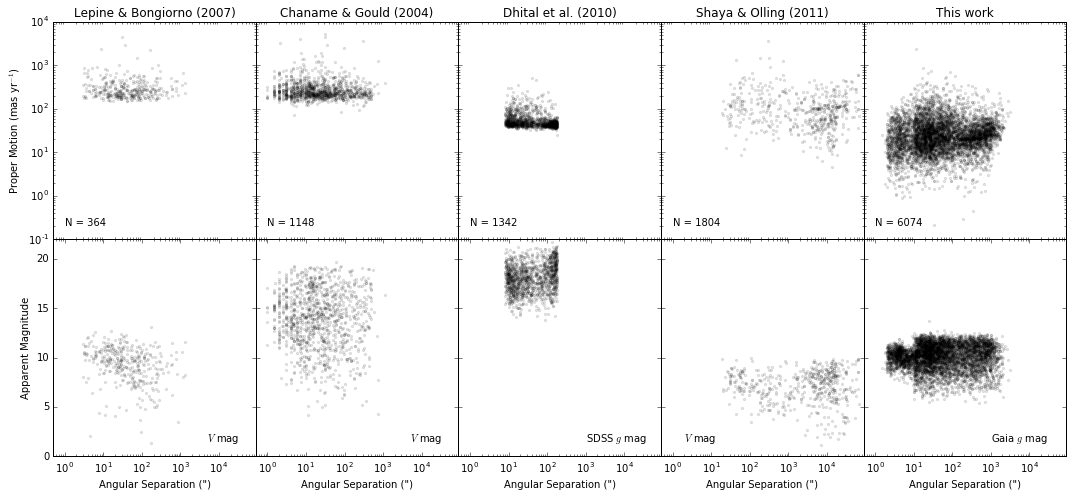

In [70]:
fig, ax = plt.subplots(2, 5, figsize=(15,7))


# Lepine & Bongiorno (2007)
LB07_pm = np.sqrt(LB07['pmRA1']**2 + LB07['pmDE1']**2) * 1.0e3
ax[0,0].scatter(LB07['Angsep'], LB07_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,0].scatter(LB07['Angsep'], LB07['Vmag1'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,0].set_title("Lepine & Bongiorno (2007)")
#ax[1,0].set_ylabel(r'$V$ magnitude')
ax[0,0].text(1, 0.2, "N = " + str(len(LB07)))
ax[1,0].text(5.0e3, 1.5, r'$V$ mag')

# Chaname & Gould (2004)
CG04_pm = np.sqrt(CG04['pmRA-A']**2 + CG04['pmDE-A']**2) * 1.0e3
ax[0,1].scatter(CG04['DelSep'], CG04_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,1].scatter(CG04['DelSep'], CG04['VmagA'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,1].set_title('Chaname & Gould (2004)')
#ax[1,1].set_ylabel(r'$V$ magnitude')
ax[0,1].text(1, 0.2, "N = " + str(len(CG04)))
ax[1,1].text(5.0e3, 1.5, r'$V$ mag')

# Slowpokes pairs - Dhital et al. (2010)
D10_pm = np.sqrt(D10['PMRA'].T[0]**2 + D10['PMDEC'].T[0]**2)
ax[0,2].scatter(D10['THETA'], D10_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,2].scatter(D10['THETA'], D10['PSFMAG'].T[0][1], color='k', marker='.', alpha=0.1, rasterized=True) # SDSS PSF g magnitude
ax[0,2].set_title('Dhital et al. (2010)')
#ax[1,2].set_ylabel(r'SDSS $g$ magnitude')
ax[0,2].text(1, 0.2, "N = " + str(len(D10)))
ax[1,2].text(1.0e3, 1.5, r'SDSS $g$ mag')

# Hipparcos pairs - Shaya & Olling (2011)
SO11_pm = np.sqrt(SO_pairs['mu_ra_1']**2 + SO_pairs['mu_dec_1']**2)
ax[0,3].scatter(SO_pairs['theta'], SO11_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,3].scatter(SO_pairs['theta'], SO_pairs['Vmag_1'], color='k', marker='.', alpha=0.1, rasterized=True) # SDSS PSF g magnitude
ax[0,3].set_title('Shaya & Olling (2011)')
#ax[1,3].set_ylabel(r'$V$ magnitude')
ax[0,3].text(1, 0.2, "N = " + str(len(SO11)))
ax[1,3].text(2.0e0, 1.5, r'$V$ mag')

# Our pairs
TGAS_pm = np.sqrt(TGAS['mu_ra_1']**2 + TGAS['mu_dec_1']**2)
ax[0,4].scatter(TGAS['theta'], TGAS_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,4].scatter(TGAS['theta'], TGAS['gaia_g_mag_1'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,4].set_title('This work')
#ax[1,4].set_ylabel(r'Gaia $g$ magnitude')
ax[0,4].text(1, 0.2, "N = " + str(len(TGAS)))
ax[1,4].text(1.0e3, 1.5, r'Gaia $g$ mag')


for i in np.arange(5):
    ax[1,i].set_xscale('log')
    ax[1,i].set_xlim(0.5, 90000)
    ax[1,i].set_xlabel('Angular Separation (")')
    ax[1,i].set_ylim(0,22)
    if i != 0:
        ax[1,i].set_yticklabels([])

for i in np.arange(5):
    ax[0,i].set_xscale('log')
    ax[0,i].set_yscale('log')
    ax[0,i].set_xlim(0.5, 90000)
    ax[0,i].set_ylim(0.1, 1.0e4)
#    ax[0,i].set_xlabel('Angular Separation (")')
    ax[0,i].set_xticks([])
    if i != 0:
        ax[0,i].set_yticklabels([])
    
    
ax[0,0].set_ylabel(r'Proper Motion (mas yr$^{-1}$)')
ax[1,0].set_ylabel('Apparent Magnitude')
    


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('../figures/compare_catalog.pdf')
#plt.show()

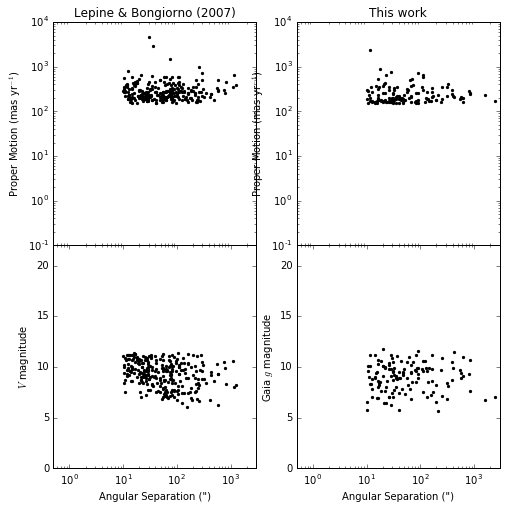

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))


idx = np.intersect1d(np.where(LB07['Vmag1'] > 6.0)[0], np.where(LB07['Vmag1'] < 11.5)[0])
idx = np.intersect1d(idx, np.where(LB07['Angsep']>10.0)[0])
# Lepine & Bongiorno (2007)
LB07_pm = np.sqrt(LB07['pmRA1']**2 + LB07['pmDE1']**2) * 1.0e3
#ax[0,0].scatter(LB07['Angsep'], LB07_pm, color='k', marker='.', rasterized=True)
#ax[1,0].scatter(LB07['Angsep'], LB07['Vmag1'], color='k', marker='.', rasterized=True)
ax[0,0].scatter(LB07['Angsep'][idx], LB07_pm[idx], color='k', marker='.', rasterized=True)
ax[1,0].scatter(LB07['Angsep'][idx], LB07['Vmag1'][idx], color='k', marker='.', rasterized=True)
ax[0,0].set_title("Lepine & Bongiorno (2007)")
ax[1,0].set_ylabel(r'$V$ magnitude')




# Our pairs
TGAS_pm = np.sqrt(TGAS['mu_ra_1']**2 + TGAS['mu_dec_1']**2)
idx = np.intersect1d(np.where(TGAS_pm > 150.0)[0], np.where(TGAS['theta']>10.0)[0])
ax[0,1].scatter(TGAS['theta'][idx], TGAS_pm[idx], color='k', marker='.', rasterized=True)
ax[1,1].scatter(TGAS['theta'][idx], TGAS['gaia_g_mag_1'][idx], color='k', marker='.', rasterized=True)
ax[0,1].set_title('This work')
ax[1,1].set_ylabel(r'Gaia $g$ magnitude')
#ax[0,1].text(1, 0.2, "N = " + str(len(TGAS)))



for i in np.arange(2):
    ax[1,i].set_xscale('log')
    ax[1,i].set_xlim(0.5, 3000)
    ax[1,i].set_xlabel('Angular Separation (")')
    ax[1,i].set_ylim(0,22)

for i in np.arange(2):
    ax[0,i].set_xscale('log')
    ax[0,i].set_yscale('log')
    ax[0,i].set_xlim(0.5, 3000)
    ax[0,i].set_ylim(0.1, 1.0e4)
    ax[0,i].set_xticks([])
    ax[0,i].set_ylabel(r'Proper Motion (mas yr$^{-1}$)')



plt.subplots_adjust(hspace=0)
plt.show()

In [32]:
idx = np.intersect1d(np.where(LB07['Vmag1'] > 6.0)[0], np.where(LB07['Vmag1'] < 11.5)[0])
idx = np.intersect1d(idx, np.where(LB07['Angsep']>10.0)[0])

for i in np.arange(len(idx)):
    print LB07['RAdeg1'][idx][i], LB07['DEdeg1'][idx][i]
    print LB07['RAdeg2'][idx][i], LB07['DEdeg2'][idx][i]

3.811452 53.074158
3.810659 53.079353
4.595309 44.022949
4.607785 44.027344
8.2559 44.73008
8.261676 44.736973
15.71966 47.047184
15.72281 47.050823
43.912773 26.873241
43.899063 26.872358
46.040165 61.70583
46.181053 61.735844
47.640724 37.37859
47.684967 37.385185
48.769833 1.037554
48.753841 1.052302
49.613102 15.17739
49.616554 15.215716
50.154175 9.033553
50.17701 9.036109
54.889988 18.384928
54.895546 18.314323
73.982841 4.67044
73.976898 4.671233
82.215134 12.550857
82.235451 12.531575
82.362572 15.577313
82.358833 15.579212
85.69101 2.678994
85.689598 2.694841
89.907333 58.593033
89.982056 58.570923
91.624947 4.511424
91.627396 4.509068
101.521034 32.555676
101.531082 32.554173
104.117172 40.074329
104.11869 40.084984
112.928116 19.965235
112.912003 19.975706
155.585358 12.145896
155.531342 12.07721
166.369156 43.526752
166.378754 43.521683
167.77153 30.446016
167.760605 30.444723
169.610245 45.866077
169.71405 45.770027
186.807114 27.024685
186.739029 27.014927
192.49498 47.13